# Analyzing newsletter urls

---

In [1]:
%matplotlib inline

# Imports

import re
import os
import json
import pprint
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variables

pp = pprint.PrettyPrinter(indent=4)

# Read data

data = []
with open('./emails.json') as input_file:
    for line in input_file:
        data.append(json.loads(line))

In [15]:
df = pd.DataFrame(data)

In [16]:
print "Number of emails downloaded: {:,}".format(df.shape[0])

Number of emails downloaded: 439


In [17]:
df.head(3)

,date,from,subject,to,urls
0,"Fri, 18 Mar 2016 10:13:47 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Buecap banking breakfast,bluecapglobal@bluecap.com,[http://cincodias.com/cincodias/2016/03/17/mer...
1,"Mon, 21 Mar 2016 10:05:11 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,[http://www.expansion.com/empresas/banca/2016/...
2,"Thu, 24 Mar 2016 10:08:11 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,[http://www.elconfidencial.com/mercados/2016-0...


In [18]:
df.groupby('subject').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"}).head(5)

,subject,count
0,Bluecap Banking Breakfast,345
1,Bluecap banking breakfast,30
2,Bluecap Banking Brunch,18
3,Re: Doc Caixa,3
4,=?UTF-8?Q?Re=3A_Si_us_plau=2C_recorda_enviar=2...,3


In [19]:
# Extract all article urls

urls = []

for idx, row in df.iterrows():
    if row['urls']:
        try:
            for url in row['urls']:
                urls.append(url)
        except:
            print idx, row['urls']
            pass

In [20]:
# Delete possible dups
urls = list(set(urls))

print "There are {:,} urls".format(len(urls))

There are 4,976 urls


In [21]:
df_urls = pd.DataFrame(urls).rename(columns={0:"url"})
df_urls.head(5)

,url
0,http://www.expansion.com/empresas/banca/2018/0...
1,http://www.expansion.com/ahorro/2018/03/09/5aa...
2,http://www.expansion.com/empresas/banca/2017/0...
3,http://www.expansion.com/empresas/banca/2017/1...
4,http://www.expansion.com/empresas/banca/2016/0...


In [25]:
df_urls['newspaper'] = df_urls['url'].apply(lambda x: re.findall('(?:\/\/www\.|\/\/)(\w+)\.\w',x))

In [26]:
for idx, row in df_urls.iterrows():
    source = row['newspaper']
    try:
        df_urls.loc[idx, 'newspaper'] = source[0]
    except:
        df_urls.loc[idx, 'newspaper'] = ""

In [27]:
source = df_urls.groupby('newspaper').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"})
source.head(10)

,newspaper,count
0,expansion,2598
1,cincodias,1289
2,elconfidencial,861
3,bernsteinresearch,78
4,blogs,36
5,retina,14
6,federalreserve,9
7,google,9
8,economia,6
9,bloomberg,4


In [28]:
print "Number of different urls extracted: {:,}".format(df_urls.shape[0])

Number of different urls extracted: 4,976


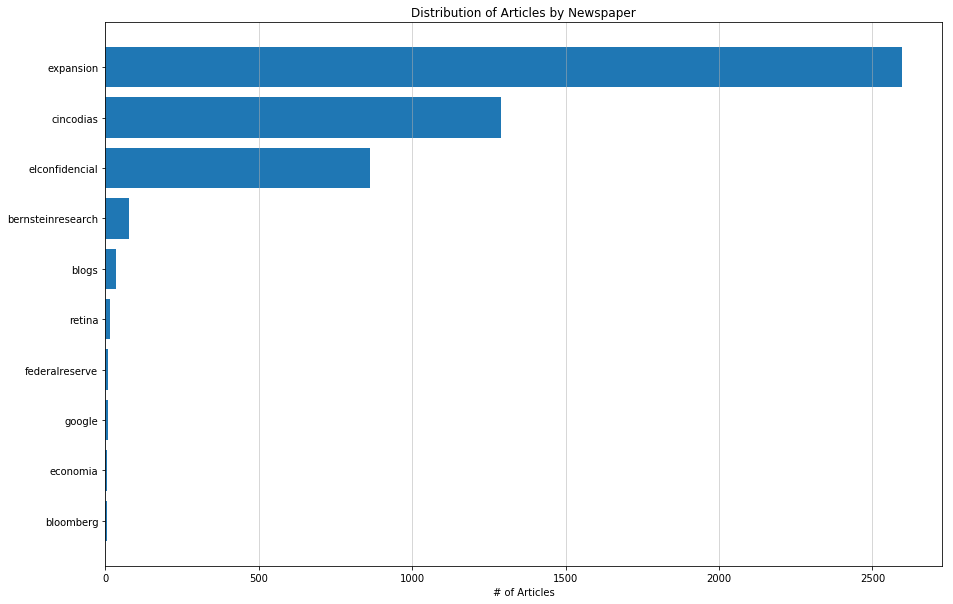

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

y_pos = np.arange(len(list(source['newspaper'])[:10]))

ax.barh(y_pos, list(source['count'])[:10], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(source['newspaper'])[:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of Articles')
ax.set_title('Distribution of Articles by Newspaper')
ax.xaxis.grid(which='major', linewidth=0.5)

plt.show()

In [31]:
# let's check that urls are properly extracted ...

df_urls['url_length'] = df_urls['url'].apply(lambda x: len(x))

In [32]:
df_urls.sort_values('url_length').head(20)

,url,newspaper,url_length
4853,http://diario.es,diario,16
2371,https://cincodia,,16
4217,http://macauhub.com,macauhub,19
2758,http://somosmuno.com,somosmuno,20
2584,http://salesforce.com,salesforce,21
906,http://www.bluecap.com,bluecap,22
802,http://www.bluecap.com/,bluecap,23
406,http://www.aknowledge.us/,aknowledge,25
4680,http://www.expansion.com/,expansion,25
733,http://www.extelsurveys.com,extelsurveys,27
